# ***Partea II - Prelucrarea avansata a datelor si compararea modelelor***

---



# **1. Prelucrarea datelor**

## **1. a) Encodarea sirurilor de caractere *(coloanele valorilor categorice)***

In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# LabelEncoder
encoder = LabelEncoder()

coloane_categorice_Label = ["aplicatia", "cupoane_de_reducere"]

for coloana in coloane_categorice_Label:
    df_train[coloana] = encoder.fit_transform(df_train[coloana])
    df_test[coloana] = encoder.fit_transform(df_test[coloana])

# OneHotEncoder
coloane_categorice_OneHot = ["dispozitiv", "metoda_de_plata"]
df_train = pd.get_dummies(df_train, columns = ["dispozitiv", "metoda_de_plata"], drop_first = True)
df_test = pd.get_dummies(df_test, columns = ["dispozitiv", "metoda_de_plata"], drop_first = True)


## **1. b) Normalizarea si standardizarea variabilelor numerice ~ *Preprocesare***

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

colaone_numerice = ["valoare_comanda_medie", "timp", "frecventa_lunara", "varsta", "recenzii"]

# Normalizarea variabilelor numerice
scaler = MinMaxScaler()
df_train[colaone_numerice] = scaler.fit_transform(df_train[colaone_numerice])
df_test[colaone_numerice] = scaler.fit_transform(df_test[colaone_numerice])

# Standardizarea variabilelor numerice
scaler = StandardScaler()
df_train[colaone_numerice] = scaler.fit_transform(df_train[colaone_numerice])
df_test[colaone_numerice] = scaler.fit_transform(df_test[colaone_numerice])

# df_train

# Crearea csv-urilor cu datele encodate
df_train.to_csv("train_encodat.csv", index=False)
df_test.to_csv("test_encodat.csv", index=False)


# **2. Analiza exploratie a datelor -> *EDA complex dupa aplicarea prelucrarilor***

## **2. a) Analiza valorilor lipsa**

### **2. a) 1. train_encodat.csv**

In [75]:
import pandas as pd

# Încarc fișierul train_encodat.csv
df = pd.read_csv('train_encodat.csv')

# Numărul de valori lipsă de pe coloane
nr_valori_lipsa = df.isna().sum()

# Procentul de valori lipsă de pe coloane
procent_valori_lipsa = (nr_valori_lipsa / n) * 100

# Creez un tabel cu numarul si procentul de valori lipsa pe coloana
data = {
    'Valori lipsă': nr_valori_lipsa,
    'Procent': procent_valori_lipsa.round(2)
}

missing_data = pd.DataFrame(data)

# Afișez rezultatul
missing_data


,Valori lipsă,Procent
valoare_comanda_medie,0,0.0
aplicatia,0,0.0
timp,0,0.0
frecventa_lunara,0,0.0
varsta,0,0.0
cupoane_de_reducere,0,0.0
recenzii,0,0.0
tip_client,0,0.0
dispozitiv_mobil,0,0.0
dispozitiv_tableta,0,0.0


### **2. a) 2. test_encodat.csv**

In [76]:
import pandas as pd

# Încarc fișierul test_encodat.csv
df = pd.read_csv('test_encodat.csv')

# Numărul de valori lipsă de pe coloane
nr_valori_lipsa = df.isna().sum()

# Procentul de valori lipsă de pe coloane
procent_valori_lipsa = (nr_valori_lipsa / n) * 100

# Creez un tabel cu numarul si procentul de valori lipsa pe coloana
data = {
    'Valori lipsă': nr_valori_lipsa,
    'Procent': procent_valori_lipsa.round(2)
}

missing_data = pd.DataFrame(data)

# Afișez rezultatul
missing_data


,Valori lipsă,Procent
valoare_comanda_medie,0,0.0
aplicatia,0,0.0
timp,0,0.0
frecventa_lunara,0,0.0
varsta,0,0.0
cupoane_de_reducere,0,0.0
recenzii,0,0.0
tip_client,0,0.0
dispozitiv_mobil,0,0.0
dispozitiv_tableta,0,0.0


## **2. b) Statistici descriptive**

### **b) 1. train_encodat.csv**

In [77]:
import pandas as pd

# Încarc fișierul train_encodat.csv
df = pd.read_csv("train_encodat.csv")
# Interpretarea principalelor statistici pentru variabilele numerice si categorice
print(df.describe(include = "all"))

        valoare_comanda_medie   aplicatia          timp  frecventa_lunara  \
count            7.000000e+02  700.000000  7.000000e+02      7.000000e+02   
unique                    NaN         NaN           NaN               NaN   
top                       NaN         NaN           NaN               NaN   
freq                      NaN         NaN           NaN               NaN   
mean            -1.421085e-16    0.610000  1.192697e-16     -3.552714e-17   
std              1.000715e+00    0.488099  1.000715e+00      1.000715e+00   
min             -2.070583e+00    0.000000 -1.657048e+00     -1.586122e+00   
25%             -6.817684e-01    0.000000 -8.349381e-01     -9.597267e-01   
50%             -1.609587e-02    1.000000 -1.282852e-02     -2.013413e-02   
75%              7.060721e-01    1.000000  8.250908e-01      9.194585e-01   
max              3.196285e+00    1.000000  1.757869e+00      1.545854e+00   

              varsta  cupoane_de_reducere      recenzii tip_client  \
count

### **b) 2. test_encodat.csv**

In [78]:
import pandas as pd

# Încarc fișierul test_encodat.csv
df = pd.read_csv("test_encodat.csv")
# Interpretarea principalelor statistici pentru variabilele numerice si categorice
print(df.describe(include = "all"))

        valoare_comanda_medie   aplicatia          timp  frecventa_lunara  \
count            3.000000e+02  300.000000  3.000000e+02      3.000000e+02   
unique                    NaN         NaN           NaN               NaN   
top                       NaN         NaN           NaN               NaN   
freq                      NaN         NaN           NaN               NaN   
mean            -2.960595e-18    0.600000  2.353673e-16      2.812565e-16   
std              1.001671e+00    0.490716  1.001671e+00      1.001671e+00   
min             -2.002369e+00    0.000000 -1.635459e+00     -1.585944e+00   
25%             -7.526066e-01    0.000000 -8.604619e-01     -9.708399e-01   
50%             -5.824882e-02    1.000000 -2.088186e-02     -4.818319e-02   
75%              6.524428e-01    1.000000  8.348440e-01      8.744736e-01   
max              2.640856e+00    1.000000  1.852028e+00      1.489578e+00   

              varsta  cupoane_de_reducere      recenzii tip_client  \
count

## **c) Analiza distributiei variabilelor**

### **c) 1. train_encodat.csv**

#### **c) 1.1 Valoarea medie a unei comenzi (valoare numerica)**

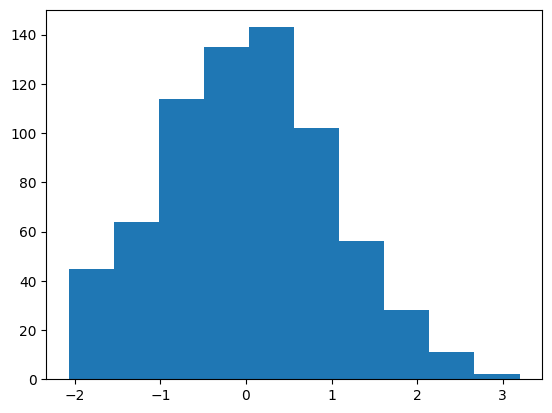

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
valoare_comanda_medie = df['valoare_comanda_medie']

# Afisez histograma pentru valoarea numerica "valoare_comanda_medie"
plt.hist(valoare_comanda_medie)
plt.show()

#### **c) 1.2 Foloseste aplicatia? (valoare categorica)**

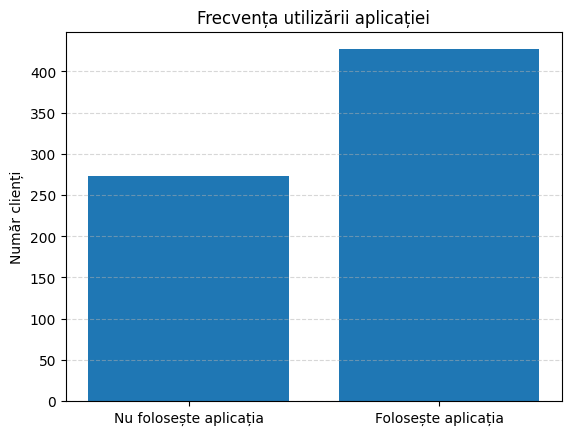

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")

# Calculez frecvențele
foloseste = df['aplicatia'].sum()
nu_foloseste = df.shape[0] - foloseste

# Creez graficul
plt.bar(['Nu folosește aplicația', 'Folosește aplicația'], [nu_foloseste, foloseste])
plt.title("Frecvența utilizării aplicației")
plt.ylabel("Număr clienți")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **c) 1.3 Ce dispozitiv foloseste? (valoare categorica)**

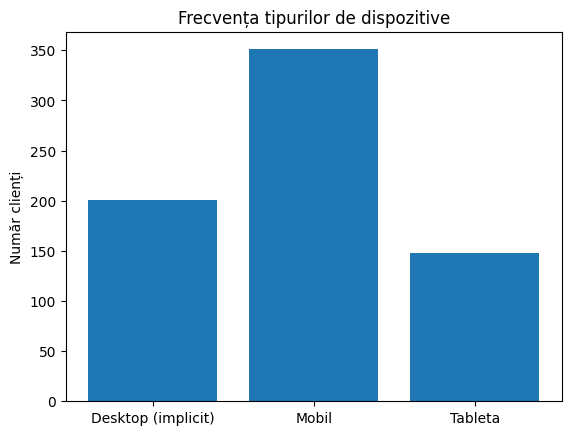

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Încarc fișierul
df = pd.read_csv("train_encodat.csv")

# Calculez frecvențele
n_total = df.shape[0]
mobil = df['dispozitiv_mobil'].sum()
tableta = df['dispozitiv_tableta'].sum()
desktop = n_total - mobil - tableta  # desktop este categoria eliminată (valoarea implicită)

# Creez graficul
plt.bar(['Desktop (implicit)', 'Mobil', 'Tableta'], [desktop, mobil, tableta])
plt.title("Frecvența tipurilor de dispozitive")
plt.ylabel("Număr clienți")
plt.show()

#### **c) 1.4 Cat timp petrece pe magazin? (valoare numerica)**

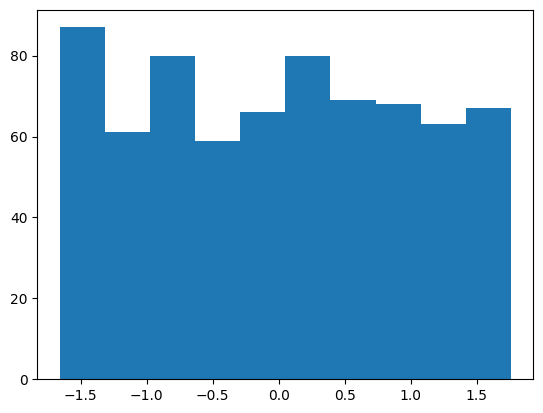

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
timp = df['timp']

# Afisez histograma pentru valoarea numerica "timp"
plt.hist(timp)
plt.show()

#### **c) 1.5 Frecventa lunara (valoare numerica)**

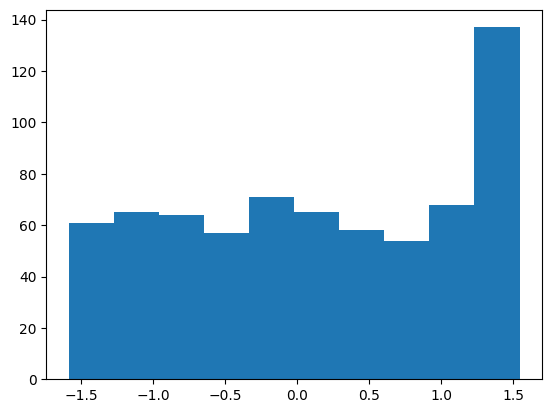

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
frecventa_lunara = df['frecventa_lunara']

# Afisez histograma pentru valoarea numerica "frecventa_lunara"
plt.hist(frecventa_lunara)
plt.show()

#### **c) 1.6 Varsta (valoare numerica)**

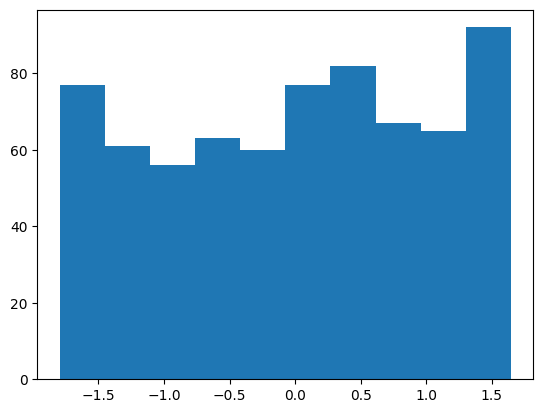

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
varsta = df['varsta']

# Afisez histograma pentru valoarea numerica "varsta"
plt.hist(varsta)
plt.show()

#### **c) 1.7 Metoda de plata (valoare categorica)**

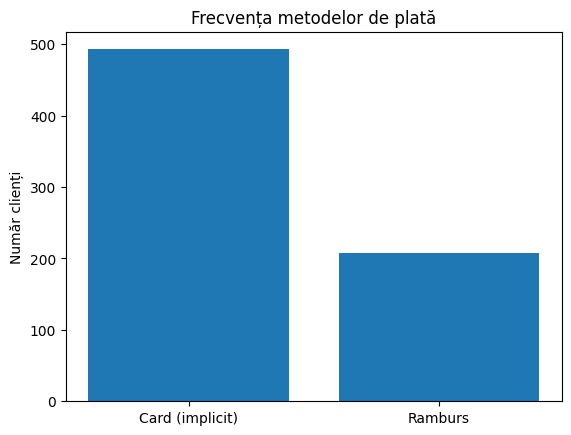

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Încarc fișierul
df = pd.read_csv("train_encodat.csv")

# Calculez frecvențele
n_total = df.shape[0]
ramburs = df['metoda_de_plata_ramburs'].sum()
card = n_total - ramburs  # card = valoarea implicită eliminată

# Creez graficul
plt.bar(['Card (implicit)', 'Ramburs'], [card, ramburs])
plt.title("Frecvența metodelor de plată")
plt.ylabel("Număr clienți")
plt.xticks(rotation=0)
plt.show()

#### **c) 1.8 Foloseste cupoane de reducere? (valoare categorica)**

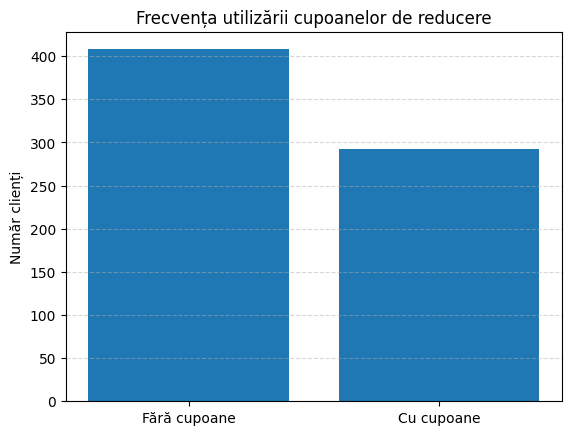

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")

# Calculez frecvențele
cupon = df['cupoane_de_reducere'].sum()
fara_cupon = df.shape[0] - cupon

# Creez graficul
plt.bar(['Fără cupoane', 'Cu cupoane'], [fara_cupon, cupon])
plt.title("Frecvența utilizării cupoanelor de reducere")
plt.ylabel("Număr clienți")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **c) 1.9 Cate recenzii acorda? (valoare numerica)**

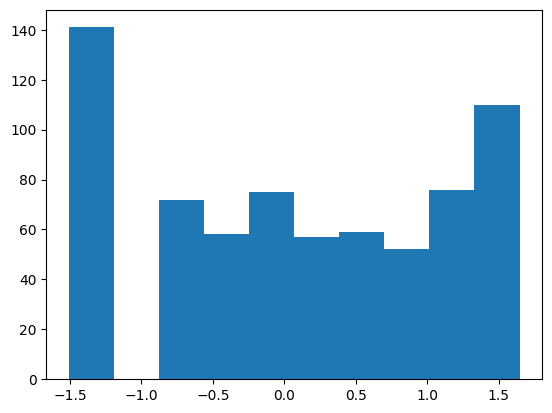

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
recenzii = df['recenzii']

# Afisez histograma pentru valoarea numerica "recenzii"
plt.hist(recenzii)
plt.show()

#### **c) 1.10 Ce tip de client este? (valoare categorica) -> *Coloana tinta***

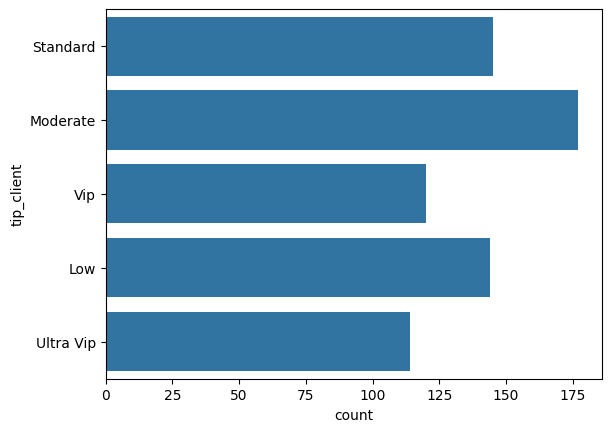

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("train_encodat.csv")
tip_client = df['tip_client']

# Afisez histograma pentru valoarea categorica "tip_client"
# Tip Countplot
sns.countplot(tip_client)
plt.show()

### **c) 2. test_encodat.csv**

#### **c) 2.1 Valoarea medie a unei comenzi (valoare numerica)**

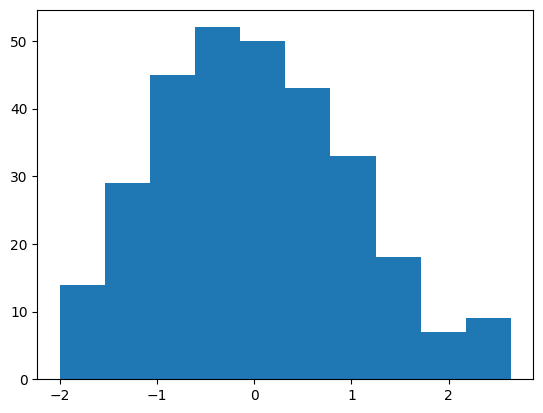

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
valoare_comanda_medie = df['valoare_comanda_medie']

# Afisez histograma pentru valoarea numerica "valoare_comanda_medie"
plt.hist(valoare_comanda_medie)
plt.show()

#### **c) 2.2 Foloseste aplicatia? (valoare categorica)**

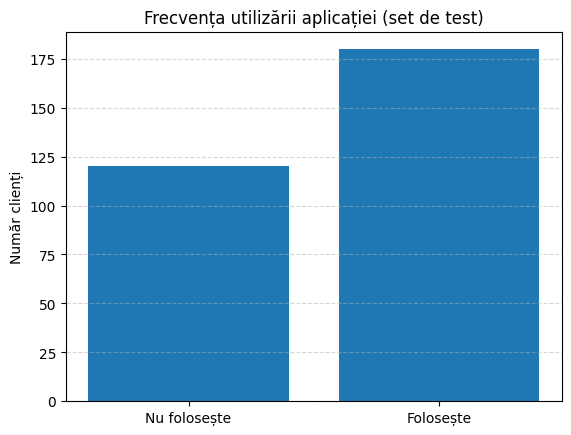

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# Încarc fișierul test_encodat.csv
df = pd.read_csv("test_encodat.csv")

# Calculez frecvențele
foloseste = df['aplicatia'].sum()
nu_foloseste = df.shape[0] - foloseste

# Creez graficul
plt.bar(['Nu folosește', 'Folosește'], [nu_foloseste, foloseste])
plt.title("Frecvența utilizării aplicației (set de test)")
plt.ylabel("Număr clienți")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


#### **c) 2.3 Ce dispozitiv foloseste? (valoare categorica)**

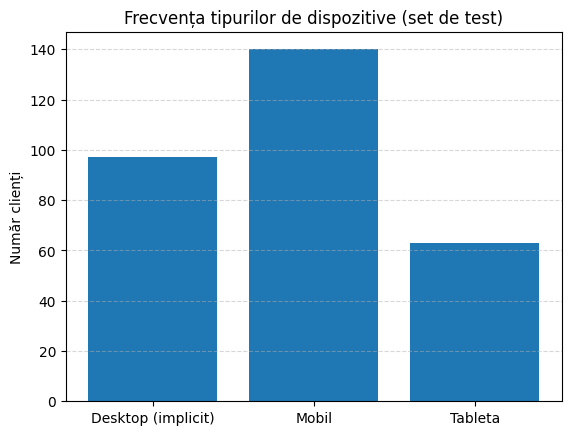

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Încarc fișierul test_encodat.csv
df = pd.read_csv("test_encodat.csv")

# Calculez frecvențele
n_total = df.shape[0]
mobil = df['dispozitiv_mobil'].sum()
tableta = df['dispozitiv_tableta'].sum()
desktop = n_total - mobil - tableta  # categoria implicită eliminată

# Creez graficul
plt.bar(['Desktop (implicit)', 'Mobil', 'Tableta'], [desktop, mobil, tableta])
plt.title("Frecvența tipurilor de dispozitive (set de test)")
plt.ylabel("Număr clienți")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **c) 2.4 Cat timp petrece pe magazin? (valoare numerica)**

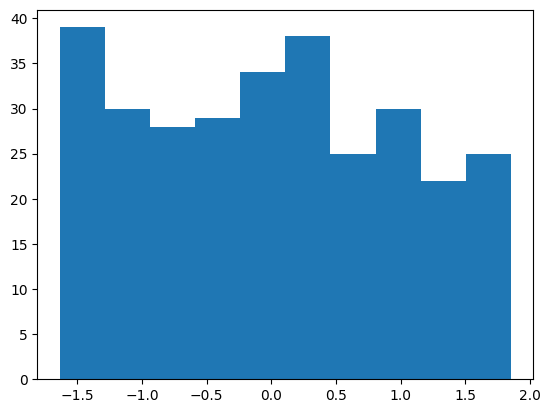

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
timp = df['timp']

# Afisez histograma pentru valoarea numerica "timp"
plt.hist(timp)
plt.show()

#### **c) 2.5 Frecventa lunara (valoare numerica)**

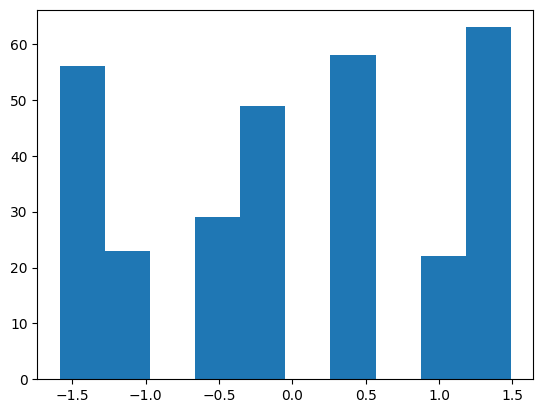

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
frecventa_lunara = df['frecventa_lunara']

# Afisez histograma pentru valoarea numerica "frecventa_lunara"
plt.hist(frecventa_lunara)
plt.show()

#### **c) 2.6 Varsta (valoare numerica)**

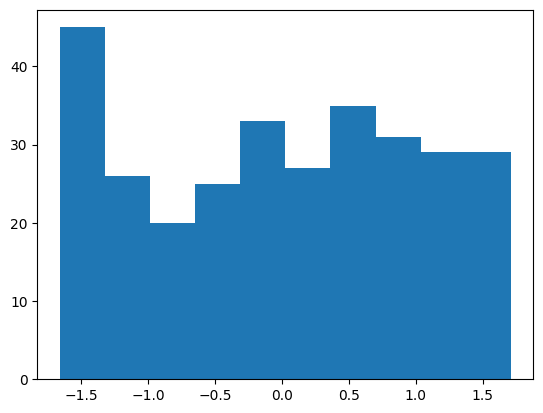

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
varsta = df['varsta']

# Afisez histograma pentru valoarea numerica "varsta"
plt.hist(varsta)
plt.show()

#### **c) 2.7 Metoda de plata (valoare categorica)**

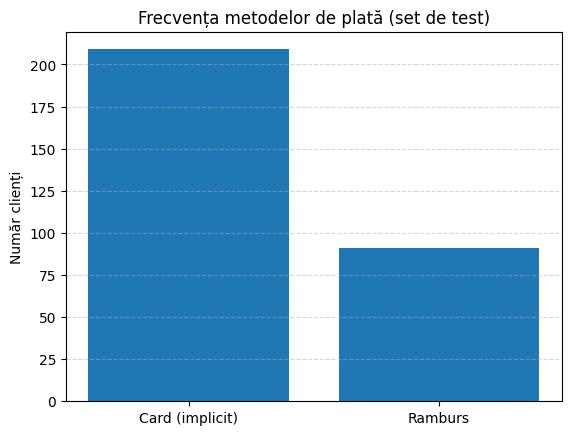

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Încarc datele
df = pd.read_csv("test_encodat.csv")

# Calculez frecvențele
ramburs = df['metoda_de_plata_ramburs'].sum()
card = df.shape[0] - ramburs  # card e implicit

# Creez graficul
plt.bar(['Card (implicit)', 'Ramburs'], [card, ramburs])
plt.title("Frecvența metodelor de plată (set de test)")
plt.ylabel("Număr clienți")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **c) 2.8 Foloseste cupoane de reducere? (valoare categorica)**

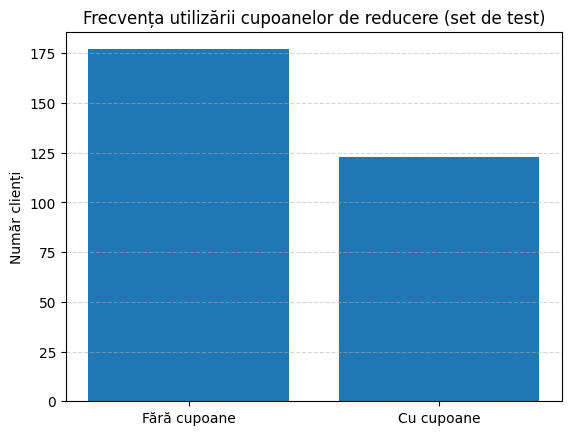

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# Încarc fișierul test_encodat.csv
df = pd.read_csv("test_encodat.csv")

# Calculez frecvențele
cupon = df['cupoane_de_reducere'].sum()
fara_cupon = df.shape[0] - cupon

# Creez graficul
plt.bar(['Fără cupoane', 'Cu cupoane'], [fara_cupon, cupon])
plt.title("Frecvența utilizării cupoanelor de reducere (set de test)")
plt.ylabel("Număr clienți")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **c) 2.9 Cate recenzii acorda? (valoare numerica)**

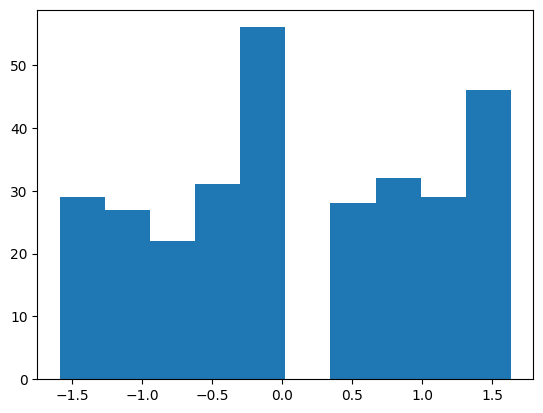

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
recenzii = df['recenzii']

# Afisez histograma pentru valoarea numerica "recenzii"
plt.hist(recenzii)
plt.show()

#### **c) 2.10 Ce tip de client este? (valoare categorica) -> *Coloana tinta***

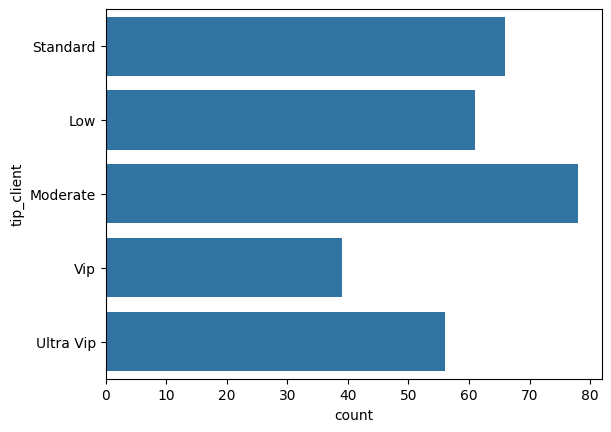

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("test_encodat.csv")
tip_client = df['tip_client']

# Afisez histograma pentru valoarea categorica "tip_client"
# Tip Countplot
sns.countplot(tip_client)
plt.show()

## **d) Detectarea outlierilor**

### **d) 1. train_encodat.csv**

#### **d) 1.1 Valoarea medie a unei comezi**

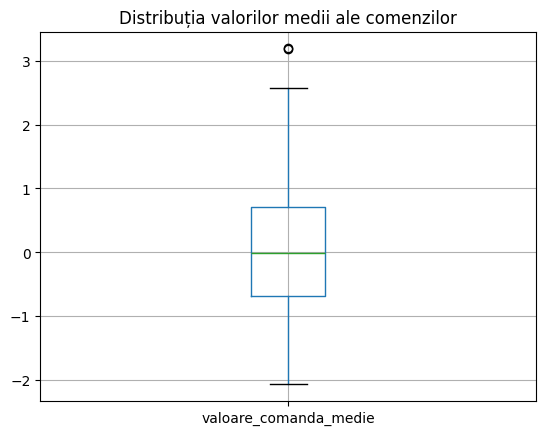

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
# Boxplot pentru valorile medii ale comenzilor
df.boxplot(column = "valoare_comanda_medie")
plt.title("Distribuția valorilor medii ale comenzilor")
plt.show()



#### **d) 1.2 Timpul petrecut pe magazin**

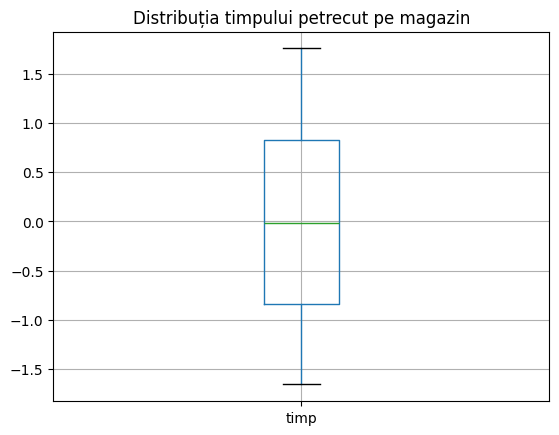

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
# Boxplot pentru timpul petrecut pe magazin
df.boxplot(column = "timp")
plt.title("Distribuția timpului petrecut pe magazin")
plt.show()



#### **d) 1.3 Frecventa lunara**

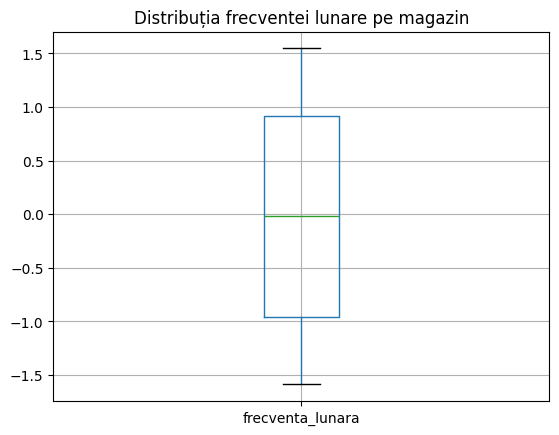

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
# Boxplot pentru frecventa lunara pe magazin
df.boxplot(column = "frecventa_lunara")
plt.title("Distribuția frecventei lunare pe magazin")
plt.show()



#### **d) 1.4 Varsta clientului**

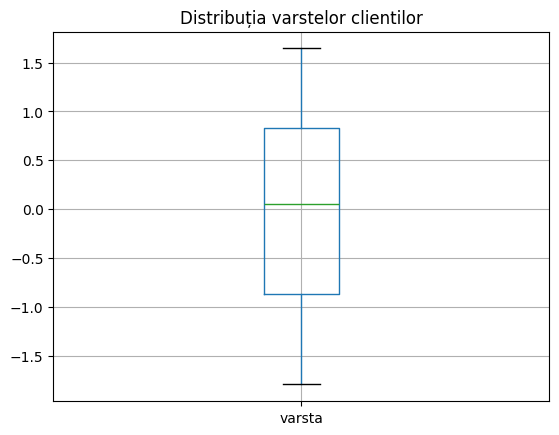

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
# Boxplot pentru varstele clientilor
df.boxplot(column = "varsta")
plt.title("Distribuția varstelor clientilor")
plt.show()



#### **d) 1.5 Recenzii**

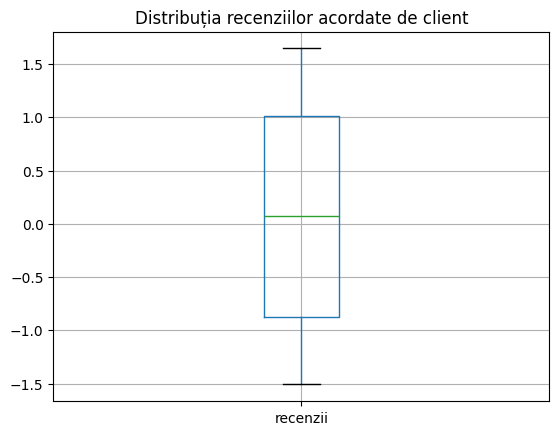

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("train_encodat.csv")
# Boxplot pentru recenzile acordate de client
df.boxplot(column = "recenzii")
plt.title("Distribuția recenziilor acordate de client")
plt.show()



### **d) 2. test_encodat.csv**

#### **d) 2.1 Valoarea medie a unei comezi**

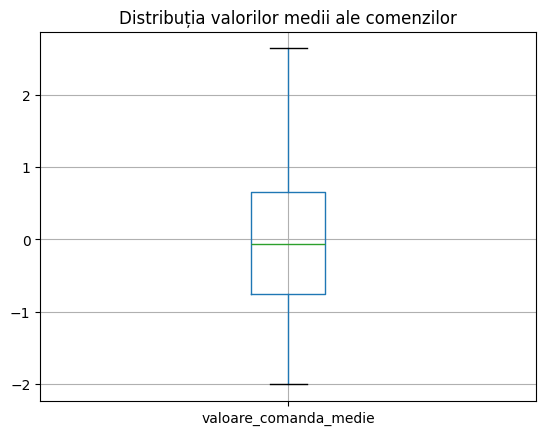

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
# Boxplot pentru valorile medii ale comenzilor
df.boxplot(column = "valoare_comanda_medie")
plt.title("Distribuția valorilor medii ale comenzilor")
plt.show()



#### **d) 2.2 Timpul petrecut pe magazin**

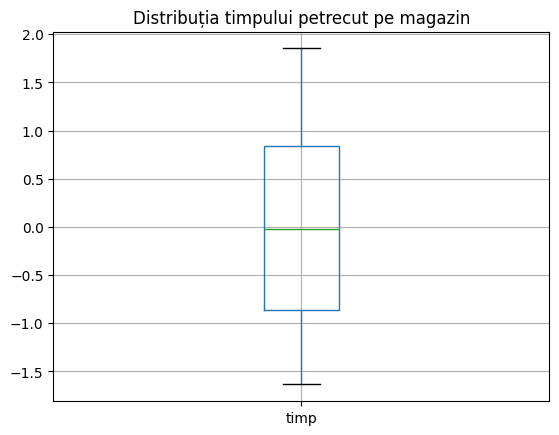

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
# Boxplot pentru timpul petrecut pe magazin
df.boxplot(column = "timp")
plt.title("Distribuția timpului petrecut pe magazin")
plt.show()



#### **d) 2.3 Frecventa lunara**

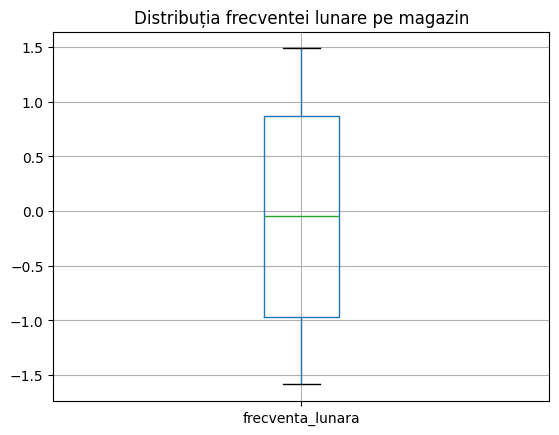

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
# Boxplot pentru frecventa lunara pe magazin
df.boxplot(column = "frecventa_lunara")
plt.title("Distribuția frecventei lunare pe magazin")
plt.show()



#### **d) 2.4 Varsta clientului**

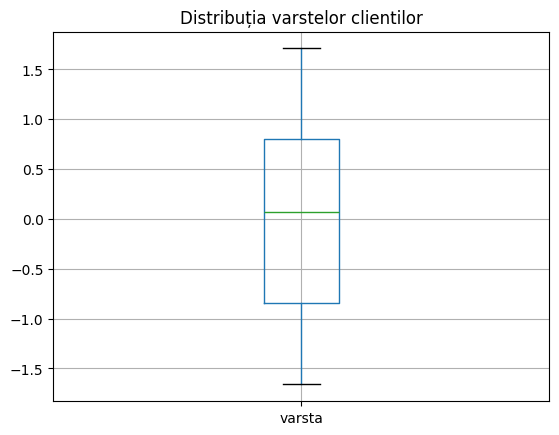

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
# Boxplot pentru varstele clientilor
df.boxplot(column = "varsta")
plt.title("Distribuția varstelor clientilor")
plt.show()



#### **d) 2.5 Recenzii**

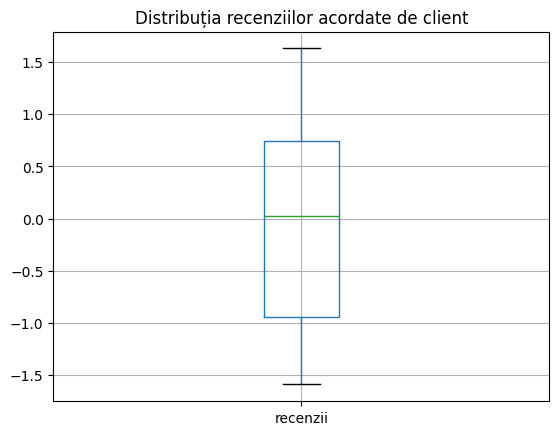

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("test_encodat.csv")
# Boxplot pentru recenzile acordate de client
df.boxplot(column = "recenzii")
plt.title("Distribuția recenziilor acordate de client")
plt.show()



## **e) Analiza corelatiilor**

#### **e) 1. train_encodat.csv**

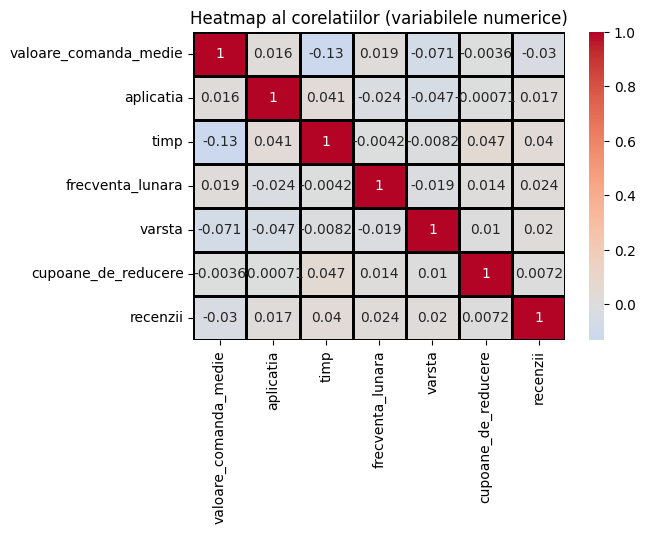

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train_encodat.csv")

df_numeric = df.select_dtypes(include = ['number'])
corr = df_numeric.corr()

plt.figure(figsize = (6, 4))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0, linewidths = 1, linecolor = 'black')
plt.title('Heatmap al corelatiilor (variabilele numerice)')
plt.show()

### **e) 2. test_encodat.csv**

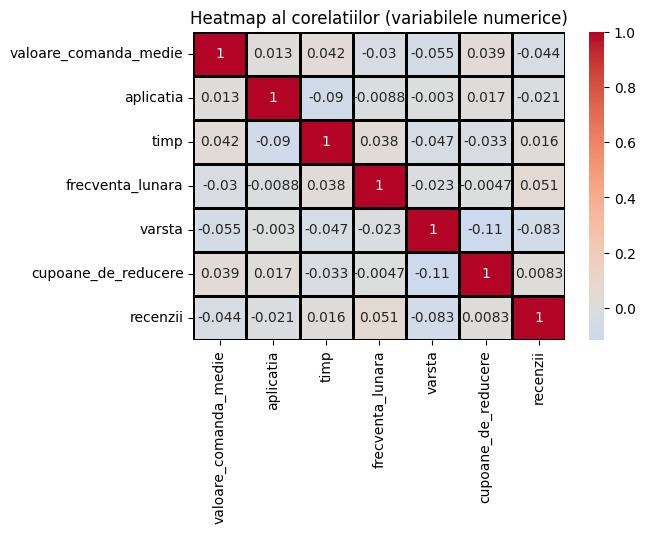

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test_encodat.csv")

df_numeric = df.select_dtypes(include = ['number'])
corr = df_numeric.corr()

plt.figure(figsize = (6, 4))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0, linewidths = 1, linecolor = 'black')
plt.title('Heatmap al corelatiilor (variabilele numerice)')
plt.show()

## **f) Analiza relatiilor cu variabila tinta**

### **f) 1. train_encodat.csv**

#### **f) 1.1 valoare_comanda_medie <-> tip_client**

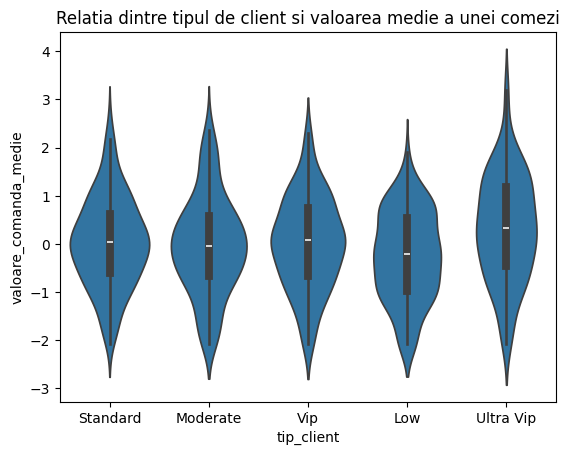

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'valoare_comanda_medie', data = df)
plt.title('Relatia dintre tipul de client si valoarea medie a unei comezi')
plt.show()


#### **f) 1.2 aplicatia <-> tip_client**

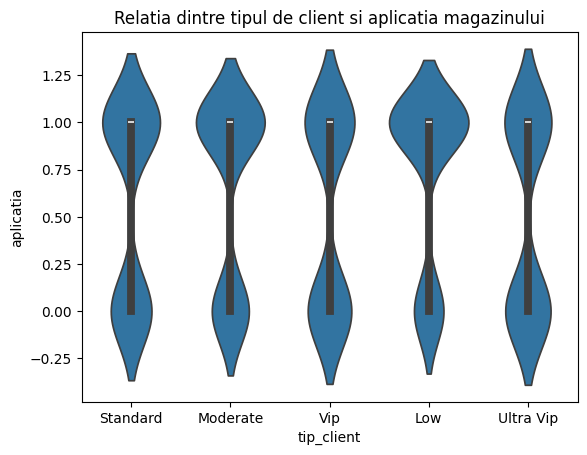

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'aplicatia', data = df)
plt.title('Relatia dintre tipul de client si aplicatia magazinului')
plt.show()


#### **f) 1.3 dispozitiv <-> tip_client**

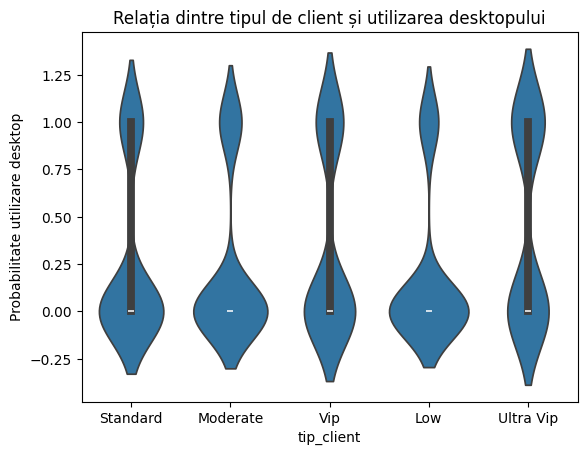

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încarc datele
df = pd.read_csv("train_encodat.csv")

# Reconstituim dispozitivul desktop
df["dispozitiv_desktop"] = 1 - df["dispozitiv_mobil"] - df["dispozitiv_tableta"]

# Grafic violinplot
sns.violinplot(x='tip_client', y='dispozitiv_desktop', data=df)
plt.title('Relația dintre tipul de client și utilizarea desktopului')
plt.ylabel('Probabilitate utilizare desktop')
plt.show()


#### **f) 1.4 timp <-> tip_client**

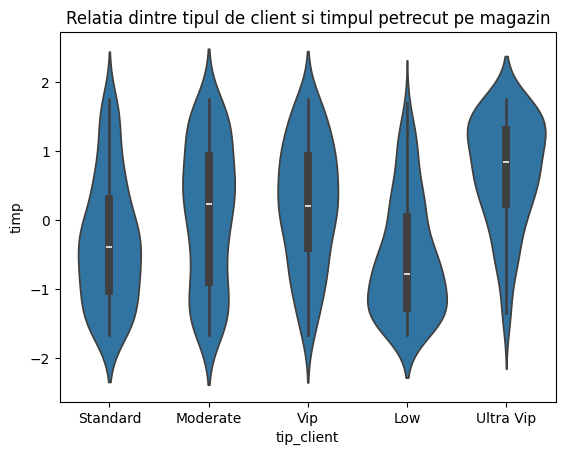

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'timp', data = df)
plt.title('Relatia dintre tipul de client si timpul petrecut pe magazin')
plt.show()


#### **f) 1.5 frecventa_lunara <-> tip_client**

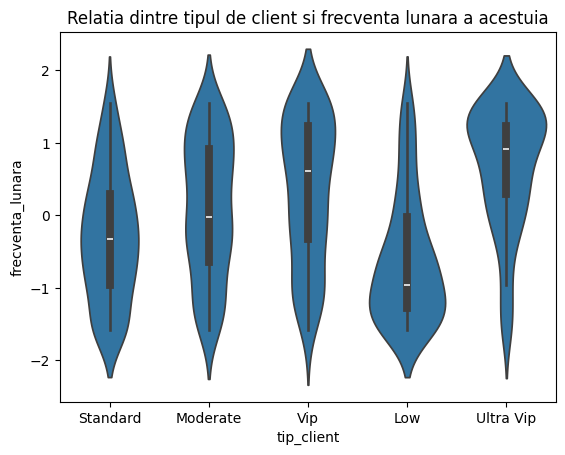

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'frecventa_lunara', data = df)
plt.title('Relatia dintre tipul de client si frecventa lunara a acestuia')
plt.show()


#### **f) 1.6 varsta <-> tip_client**

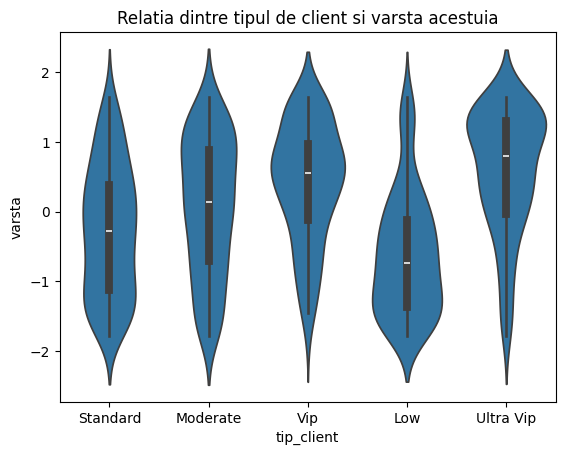

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'varsta', data = df)
plt.title('Relatia dintre tipul de client si varsta acestuia')
plt.show()


#### **f) 1.7 metoda_de_plata <-> tip_client**

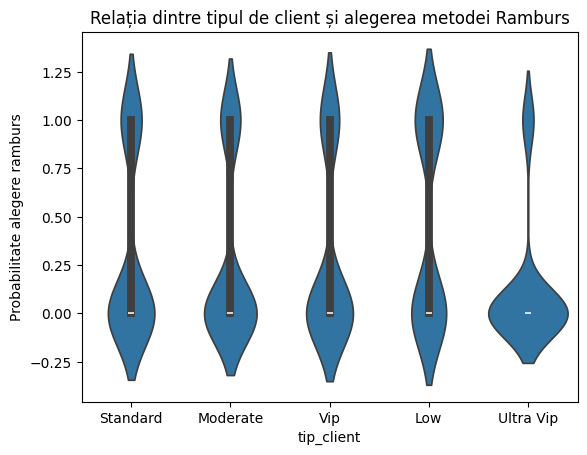

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train_encodat.csv")

sns.violinplot(x='tip_client', y='metoda_de_plata_ramburs', data=df)
plt.title('Relația dintre tipul de client și alegerea metodei Ramburs')
plt.ylabel('Probabilitate alegere ramburs')
plt.show()

#### **f) 1.8 cupoane_de_reducere <-> tip_client**

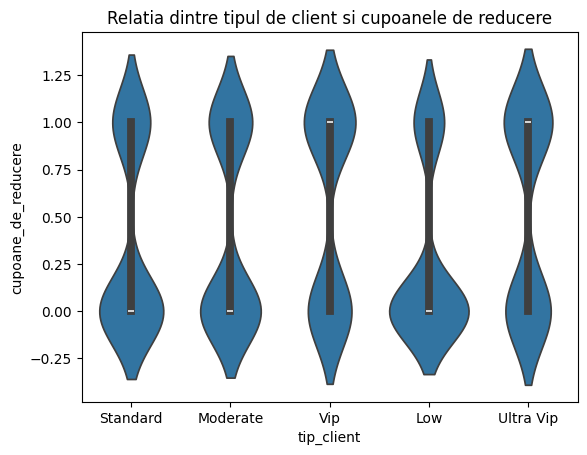

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'cupoane_de_reducere', data = df)
plt.title('Relatia dintre tipul de client si cupoanele de reducere')
plt.show()


#### **f) 1.9 recenzii <-> tip_client**

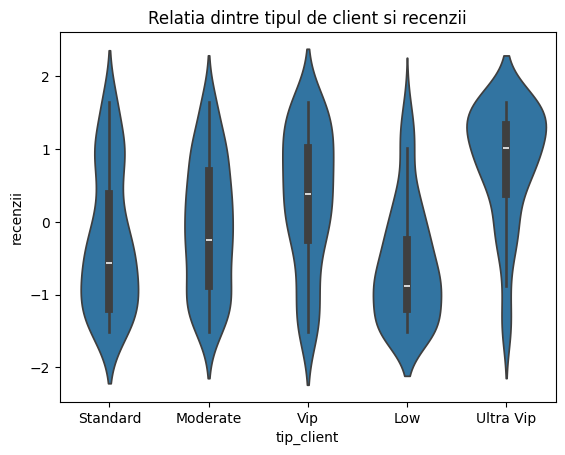

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'recenzii', data = df)
plt.title('Relatia dintre tipul de client si recenzii')
plt.show()


### **f) 2. test_encodat.csv**

#### **f) 2.1 valoare_comanda_medie <-> tip_client**

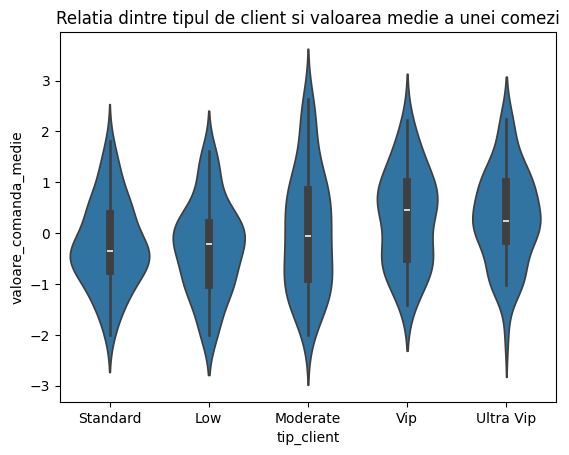

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'valoare_comanda_medie', data = df)
plt.title('Relatia dintre tipul de client si valoarea medie a unei comezi')
plt.show()


#### **f) 2.2 aplicatia <-> tip_client**

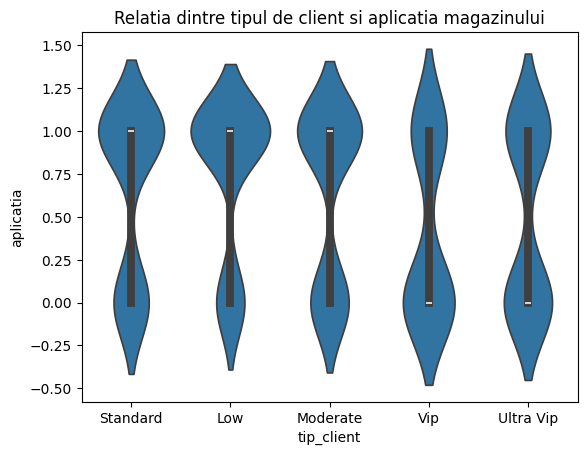

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'aplicatia', data = df)
plt.title('Relatia dintre tipul de client si aplicatia magazinului')
plt.show()


#### **f) 2.3 dispozitiv <-> tip_client**

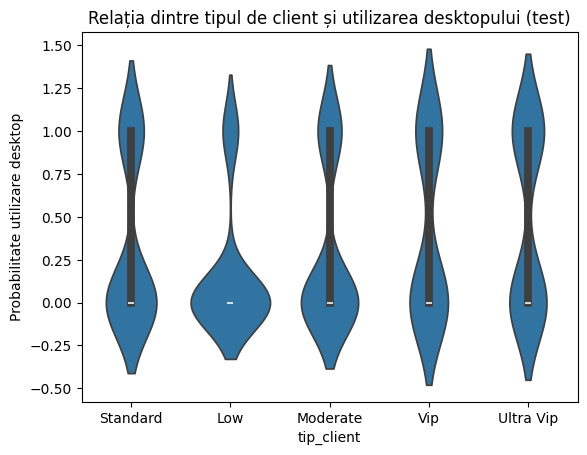

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încarc datele
df = pd.read_csv("test_encodat.csv")

# Reconstruiesc dispozitiv_desktop
df['dispozitiv_desktop'] = 1 - df['dispozitiv_mobil'] - df['dispozitiv_tableta']

# Violinplot între tip_client și desktop
sns.violinplot(x='tip_client', y='dispozitiv_desktop', data=df)
plt.title('Relația dintre tipul de client și utilizarea desktopului (test)')
plt.ylabel('Probabilitate utilizare desktop')
plt.show()

#### **f) 2.4 timp <-> tip_client**

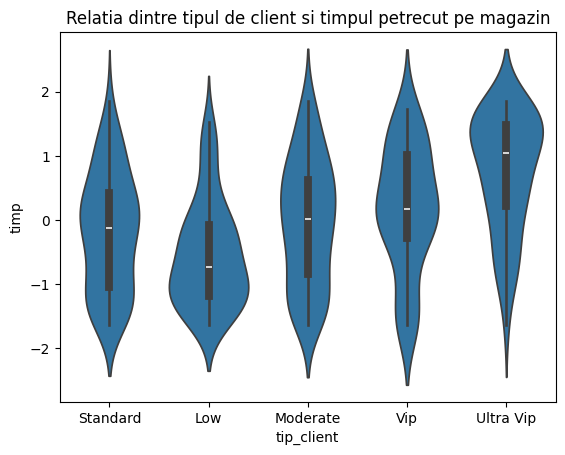

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'timp', data = df)
plt.title('Relatia dintre tipul de client si timpul petrecut pe magazin')
plt.show()


#### **f) 2.5 frecventa_lunara <-> tip_client**

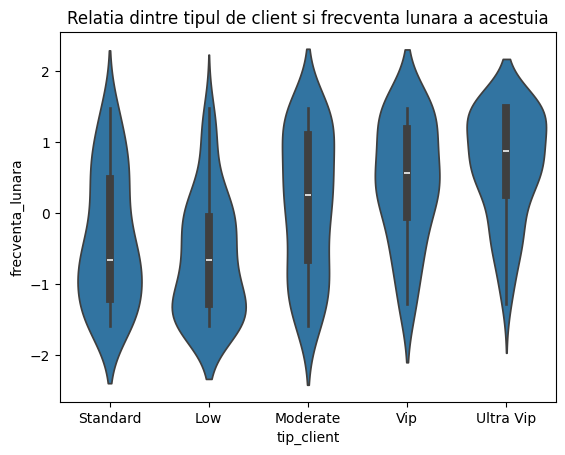

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'frecventa_lunara', data = df)
plt.title('Relatia dintre tipul de client si frecventa lunara a acestuia')
plt.show()


#### **f) 2.6 varsta <-> tip_client**

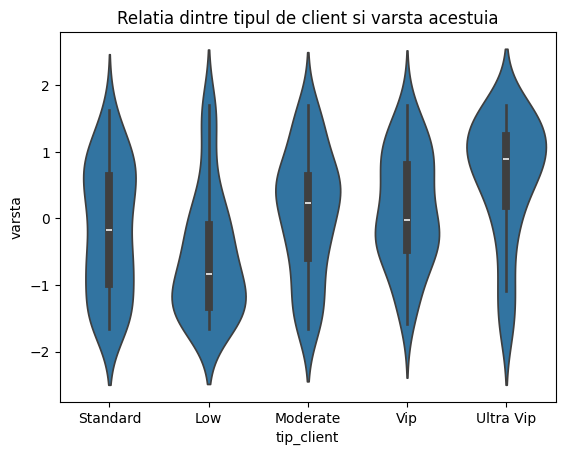

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'varsta', data = df)
plt.title('Relatia dintre tipul de client si varsta acestuia')
plt.show()


#### **f) 2.7 metoda_de_plata <-> tip_client**

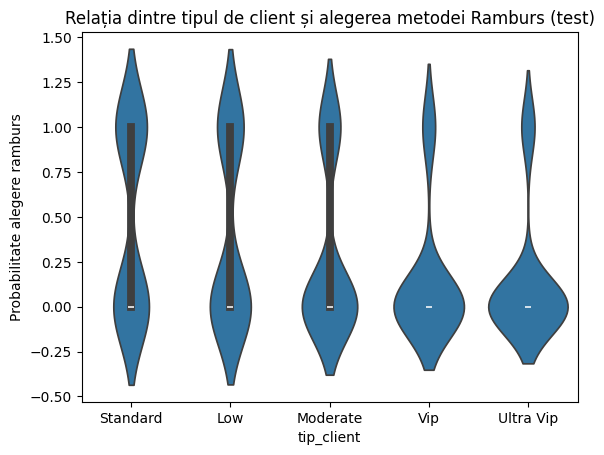

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test_encodat.csv")

sns.violinplot(x='tip_client', y='metoda_de_plata_ramburs', data=df)
plt.title('Relația dintre tipul de client și alegerea metodei Ramburs (test)')
plt.ylabel('Probabilitate alegere ramburs')
plt.show()

#### **f) 2.8 cupoane_de_reducere <-> tip_client**

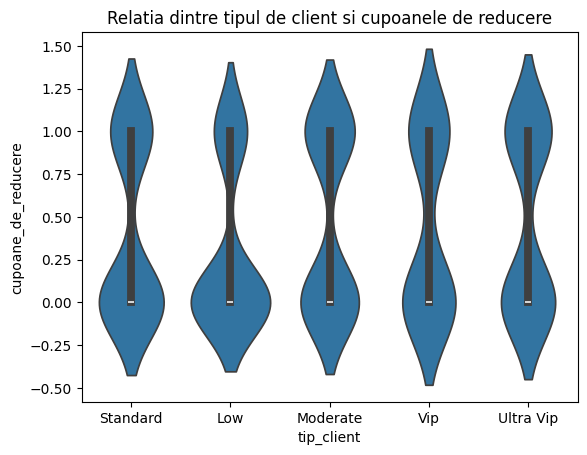

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'cupoane_de_reducere', data = df)
plt.title('Relatia dintre tipul de client si cupoanele de reducere')
plt.show()


#### **f) 2.9 recenzii <-> tip_client**

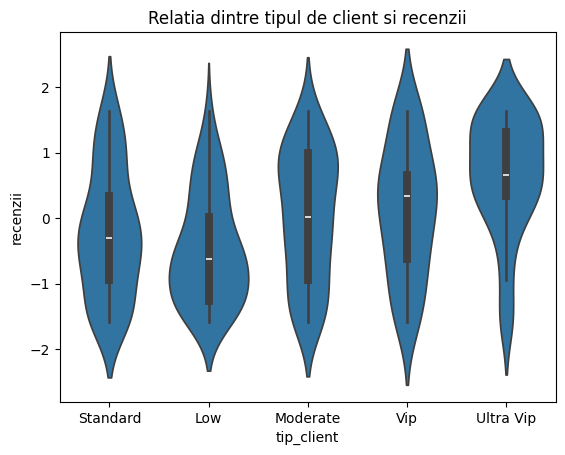

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("test_encodat.csv")

# Valoare_comanda_medie <-> tip_client
sns.violinplot(x = 'tip_client', y = 'recenzii', data = df)
plt.title('Relatia dintre tipul de client si recenzii')
plt.show()


## **g) Comentarii si interpretari personale**

# **3. Antrenarea si compararea a 3 algoritmi diferiti si evaluarea performantei**

**3. a) Impartirea datelor in antrenament si test**

In [129]:
# Separ datele de antrenare si test
X_train = df_train.drop(columns = "tip_client")
y_train = df_train["tip_client"]

X_test = df_test.drop(columns = "tip_client")
y_test = df_test["tip_client"]

**3. b) Alegerea si antrenarea modelelor**

In [130]:
# Aleg modelele: regresie logistica, random forest si KNN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initializez modelele
model1 = LogisticRegression(max_iter = 1000, class_weight = 'balanced')
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()

# Antrenez modelele
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

KNeighborsClassifier()

**3. c) Prezicerea rezultatelor**

In [131]:
# Prezic valorile pentru datele de testare
pred_model1 = model1.predict(X_test)
pred_model2 = model2.predict(X_test)
pred_model3 = model3.predict(X_test)

# Vad primele 10 predicitii pentru regresie logistica
print("Predictii model 1:\n", pred_model1[:10])
print("Adevarate:\n", y_test[:10])

# Vad primele 10 predicitii pentru random forest
print("Predictii model 2:\n", pred_model2[:10])
print("Adevarate:\n", y_test[:10])

# Vad primele 10 predicitii pentru KNN
print("Predictii model 3:\n", pred_model3[:10])
print("Adevarate:\n", y_test[:10])

Predictii model 1:
 ['Low' 'Low' 'Moderate' 'Moderate' 'Moderate' 'Low' 'Ultra Vip' 'Low'
 'Moderate' 'Low']
Adevarate:
 0     Standard
1          Low
2     Moderate
3          Vip
4     Moderate
5          Low
6    Ultra Vip
7          Low
8     Standard
9     Standard
Name: tip_client, dtype: object
Predictii model 2:
 ['Moderate' 'Low' 'Moderate' 'Moderate' 'Standard' 'Standard' 'Ultra Vip'
 'Low' 'Vip' 'Moderate']
Adevarate:
 0     Standard
1          Low
2     Moderate
3          Vip
4     Moderate
5          Low
6    Ultra Vip
7          Low
8     Standard
9     Standard
Name: tip_client, dtype: object
Predictii model 3:
 ['Moderate' 'Standard' 'Moderate' 'Moderate' 'Moderate' 'Standard'
 'Ultra Vip' 'Low' 'Moderate' 'Moderate']
Adevarate:
 0     Standard
1          Low
2     Moderate
3          Vip
4     Moderate
5          Low
6    Ultra Vip
7          Low
8     Standard
9     Standard
Name: tip_client, dtype: object


**3. d) Evaluarea performantei modelelor**

In [132]:
# Evaluez performanta fiecarui model
from sklearn.metrics import accuracy_score, f1_score

print("Logistic Regression")
print("Precizie:", accuracy_score(y_test, pred_model1))
print("Scor F1:", f1_score(y_test, pred_model1, average = "weighted"))

print("\nRandom Forest")
print("Precizie:", accuracy_score(y_test, pred_model2))
print("Scor F1:", f1_score(y_test, pred_model2, average = "weighted"))

print("\nKNN")
print("Precizie:", accuracy_score(y_test, pred_model3))
print("Scor F1:", f1_score(y_test, pred_model3, average = "weighted"))

Logistic Regression
Precizie: 0.74
Scor F1: 0.7422945045181483

Random Forest
Precizie: 0.5433333333333333
Scor F1: 0.5475260303077008

KNN
Precizie: 0.54
Scor F1: 0.5270054984113214


**3. e) Matricea de confuzie**

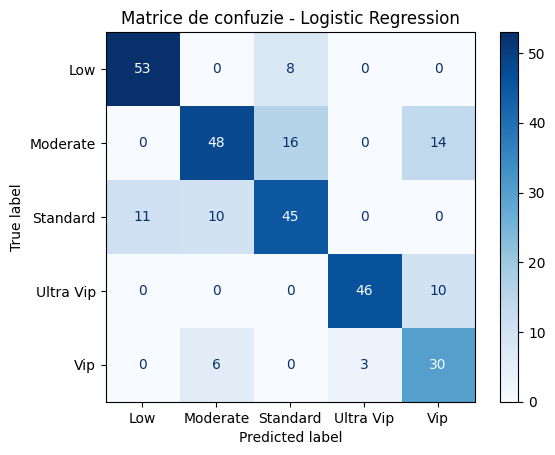

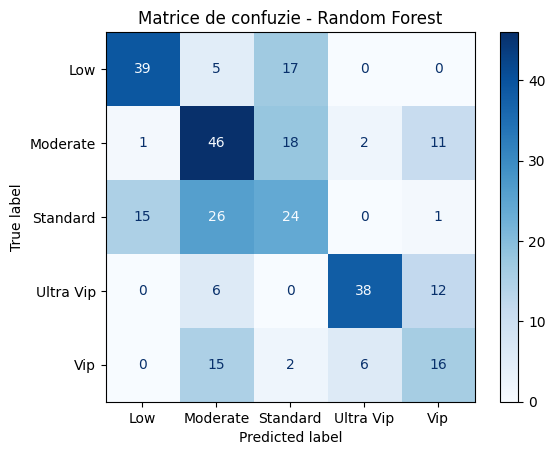

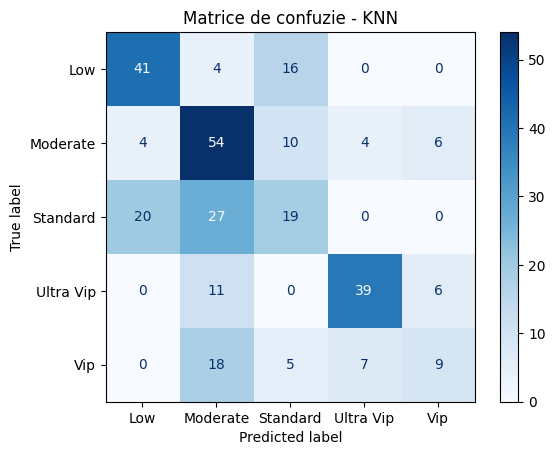

In [133]:
# Matricea de confuzie pentru fiecare model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, y_pred, model in [("Logistic Regression", pred_model1, model1), ("Random Forest", pred_model2, model2), ("KNN", pred_model3, model3) ]:
    mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = mat, display_labels = model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matrice de confuzie - {name}")
    plt.show()

**3. f) Tabel comparativ scoruri**

In [134]:
# Facem tabelul de comparatie cu scorurile obtinute (acuratete si scor F1)
import pandas as pd

comparatie = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "KNN"],
    "Acuratete": [
        accuracy_score(y_test, pred_model1),
        accuracy_score(y_test, pred_model2),
        accuracy_score(y_test, pred_model3)
    ],
    "Scor F1": [
        f1_score(y_test, pred_model1, average = "weighted"),
        f1_score(y_test, pred_model2, average = "weighted"),
        f1_score(y_test, pred_model3, average = "weighted")
    ]
})

comparatie

,Model,Acuratete,Scor F1
0,Logistic Regression,0.740000,0.742295
1,Random Forest,0.543333,0.547526
2,KNN,0.540000,0.527005
